In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

Познакомимся с данными.

In [3]:
data = pd.read_excel('Курсовая.xlsx')
data.head()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


In [5]:
data.describe()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000
mean,500.000000,222.805156,589.110728,72.508823,10.831637,10.831637,0.180681,-0.967237,0.580412,29.487989,...,0.053946,0.011988,0.008991,0.000999,0.000999,0.051948,0.0,0.069930,0.204795,0.006993
std,289.108111,402.169734,642.867508,684.482739,3.307505,3.307505,0.168710,1.588036,0.212230,12.742749,...,0.259011,0.108886,0.094441,0.031607,0.031607,0.222033,0.0,0.255157,1.215326,0.083373
min,0.000000,0.003517,0.700808,0.011489,2.321942,2.321942,0.000039,-6.992796,0.059567,9.416667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,250.000000,12.515396,99.999036,1.433333,9.252350,9.252350,0.051073,-1.334487,0.442842,18.486486,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,500.000000,46.585183,411.039342,3.846154,12.179236,12.179236,0.124606,-0.419485,0.634981,29.290323,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,750.000000,224.975928,894.089176,16.566667,13.167843,13.167843,0.291020,0.061754,0.742483,38.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1000.000000,4128.529377,4538.976189,15620.600000,15.933463,15.933463,1.374614,1.374614,0.947265,60.272727,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,20.000000,1.000000


Данные выглядят довольно разбросанными. Вероятно, придется применять логарифмирование для целевых переменных. Также сразу видно, что столбец Unnamed: 0 не несете в себе никакой важной информации - это только индексы. Его можно смело удалить.

In [7]:
data.dtypes

Unnamed: 0             int64
IC50, mM             float64
CC50, mM             float64
SI                   float64
MaxAbsEStateIndex    float64
                      ...   
fr_thiazole            int64
fr_thiocyan            int64
fr_thiophene           int64
fr_unbrch_alkane       int64
fr_urea                int64
Length: 214, dtype: object

In [8]:
data.shape

(1001, 214)

Проверим данные на аномалии: выбросы, дубликаты, пропущенные значения.

In [10]:
print(data.isna().sum())

Unnamed: 0           0
IC50, mM             0
CC50, mM             0
SI                   0
MaxAbsEStateIndex    0
                    ..
fr_thiazole          0
fr_thiocyan          0
fr_thiophene         0
fr_unbrch_alkane     0
fr_urea              0
Length: 214, dtype: int64


In [11]:
data = data.drop_duplicates()

In [12]:
un_feats = data.nunique()
data = data.drop(columns=un_feats[un_feats == 1].index)

In [13]:
data = data.drop(columns = ['Unnamed: 0'])

<Axes: >

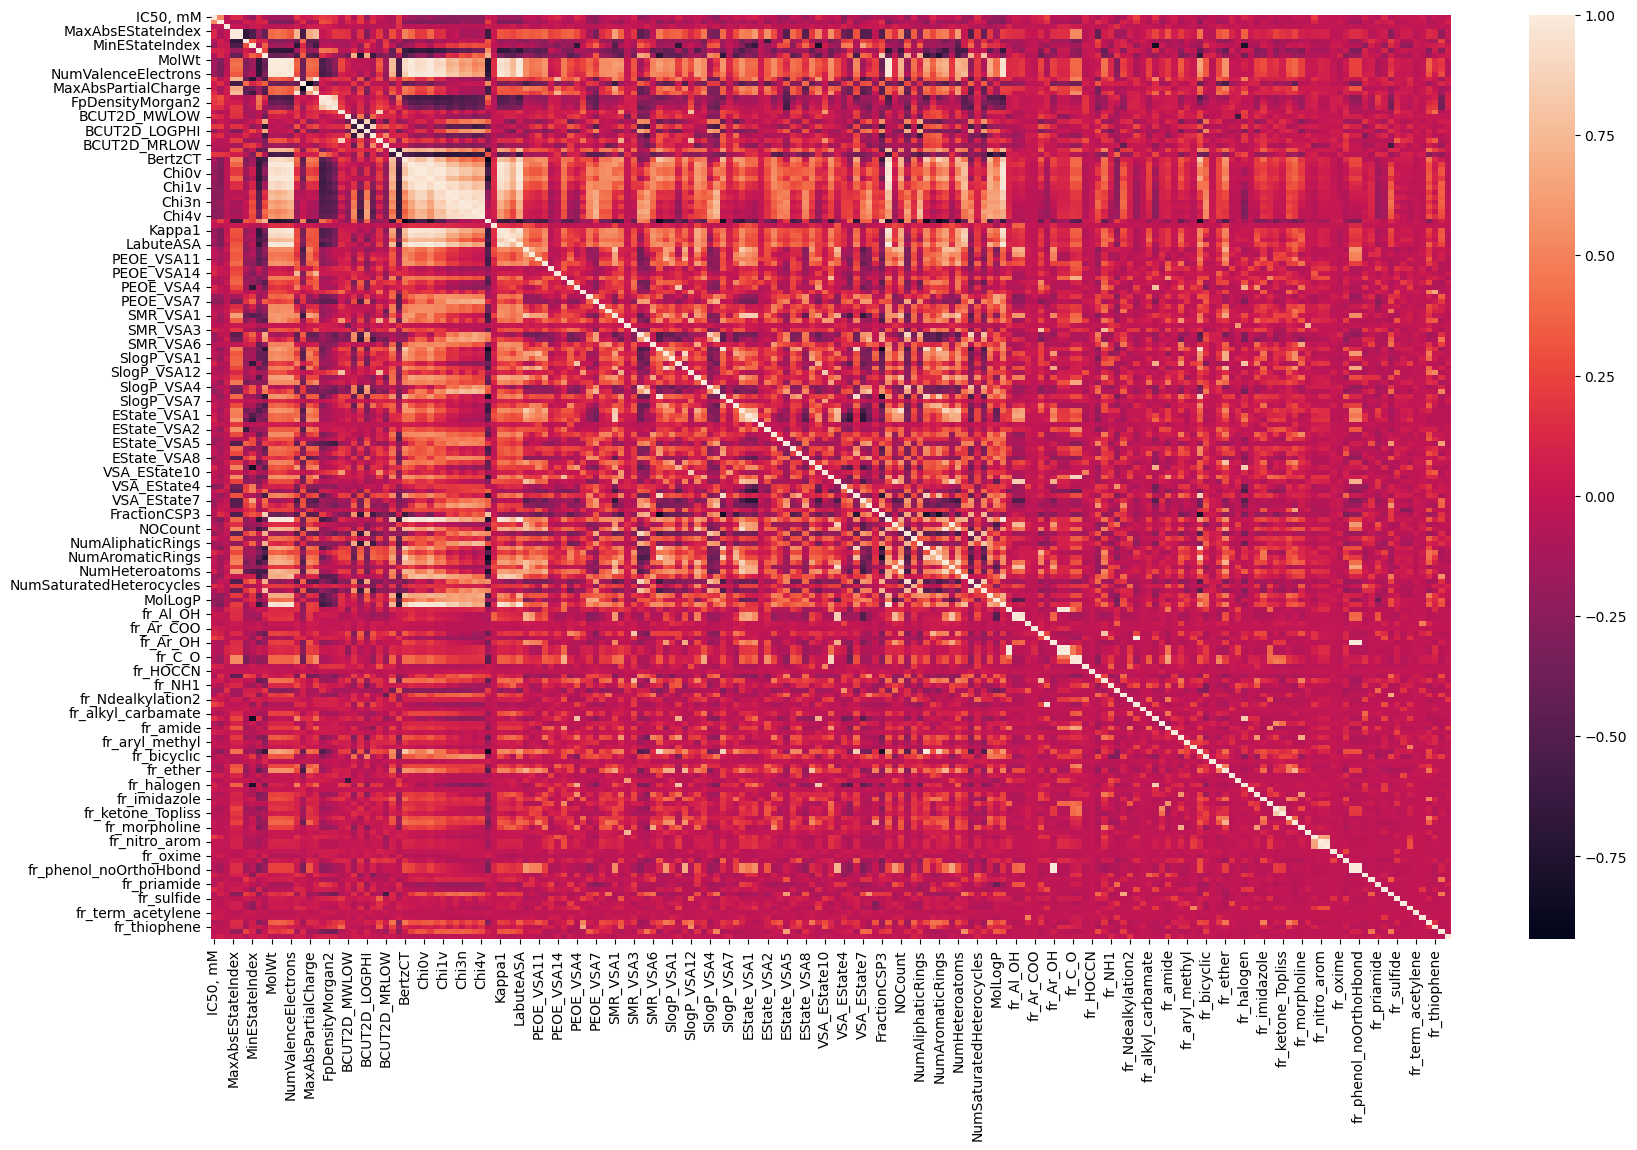

In [14]:
plt.figure(figsize = (20, 12))
sns.heatmap(data.corr(), annot = False)

Внешне тепловая карта корреляции выглядит довольно сумбурно, однако можно заметить, что в ней много признаков, достаточно сильно коррелирующих друг с другом - нам придется выбирать подходящие признаки для каждой из поставленных задач.

Проверим распределение данных в наших целевых переменных.

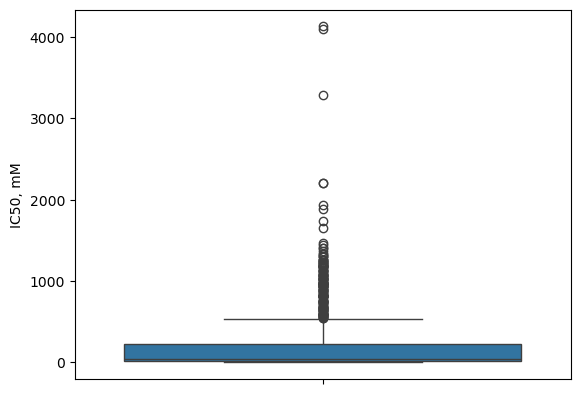

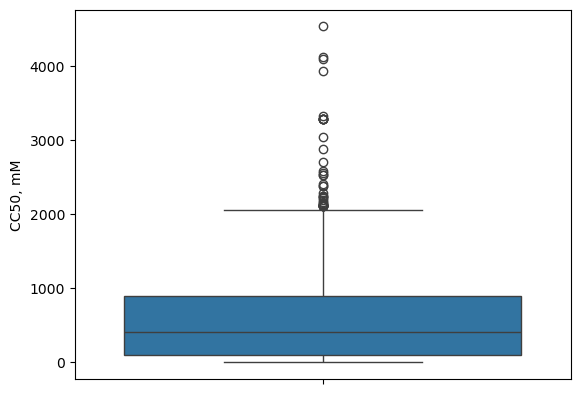

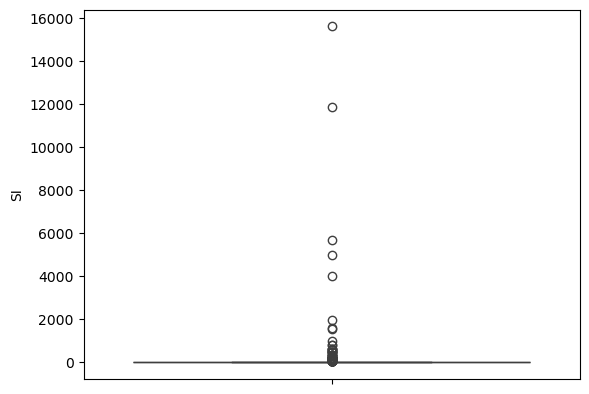

In [16]:
sns.boxplot(data=data, y="IC50, mM")
plt.show()

sns.boxplot(data=data, y="CC50, mM")
plt.show()

sns.boxplot(data=data, y="SI")
plt.show()

В целевых переменных достаточно много выбросов, поэтому удалим их с помощью IQR.

Данные в целевых переменных распределены ненормально, есть смещения, к тому же, у них большой разброс - необходимо применить логарифмирование, чтобы алгоритмы лучше обрабатывали данные. Также, исходя из поставленных задач, нам необходимо заранее обозначить данные для классификации: медианы целевых переменных и SI < 8. Последний пункт необходимо сделать до логарифмирования, иначе необходимые показатели исказятся.

In [18]:
X_all = data.drop(columns = ['IC50, mM', 'CC50, mM', 'SI'], axis=1)  #выделение целевых переменных
y_ic = data['IC50, mM']
y_cc = data['CC50, mM']
y_si = data['SI']

In [19]:
Q1_ic = y_ic.quantile(0.25)   #удаление выбросов в целевых переменных
Q3_ic = y_ic.quantile(0.75)
IQR_ic = Q3_ic - Q1_ic
Q1_cc = y_cc.quantile(0.25)
Q3_cc = y_cc.quantile(0.75)
IQR_cc = Q3_cc - Q1_cc
Q1_si = y_si.quantile(0.25)
Q3_si = y_si.quantile(0.75)
IQR_si = Q3_si - Q1_si

lower_bound_ic = Q1_ic - 1.5 * IQR_ic
upper_bound_ic = Q3_ic + 1.5 * IQR_ic
lower_bound_cc = Q1_cc - 1.5 * IQR_cc
upper_bound_cc = Q3_cc + 1.5 * IQR_cc
lower_bound_si = Q1_si - 1.5 * IQR_si
upper_bound_si = Q3_si + 1.5 * IQR_si

print(f"Выбросы ниже {lower_bound_ic:.2f} и выше {upper_bound_ic:.2f}")
print(f"Выбросы ниже {lower_bound_cc:.2f} и выше {upper_bound_cc:.2f}")
print(f"Выбросы ниже {lower_bound_si:.2f} и выше {upper_bound_si:.2f}")

Выбросы ниже -306.18 и выше 543.67
Выбросы ниже -1091.14 и выше 2085.22
Выбросы ниже -21.27 и выше 39.27


In [20]:
outliers_ic = (y_ic < lower_bound_ic) | (y_ic > upper_bound_ic).index
outliers_cc = (y_cc < lower_bound_cc) | (y_cc > upper_bound_cc).index
outliers_si = (y_si < lower_bound_si) | (y_si > upper_bound_si).index

y_ic = y_ic.drop(outliers_ic, errors = 'ignore')
y_cc = y_cc.drop(outliers_cc, errors = 'ignore')
y_si= y_si.drop(outliers_si, errors = 'ignore')

Посмотрим на распределение целевых переменных еще раз.

(array([3.57639392e-03, 4.16197397e-04, 2.22617213e-04, 1.79061671e-04,
        1.79061671e-04, 1.54864148e-04, 6.77530647e-05, 9.67900924e-06,
        4.83950462e-06, 9.67900924e-06, 9.67900924e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.83950462e-06,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.67900924e-06]),
 array([3.51669375e-03, 2.06429810e+02, 4.12856103e+02, 6.19282396e+02,
        8.25708689e+02, 1.03213498e+03, 1.23856127e+03, 1.44498757e+03,
        1.65141386e+03, 1.85784015e+03, 2.06426645e+03, 2.27069274e+03,
        2.47711903e+03, 2.68354533e+03, 2.88997162e+03, 3.09639791e+03,
        3.30282420e+03, 3.50925050e+03, 3.71567679e+03, 3.92210308e+03,
        4.12852938e+03]),
 <BarContainer object of 20 artists>)

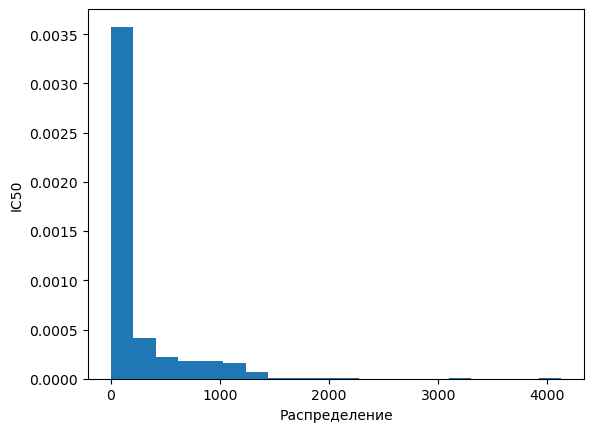

In [22]:
plt.xlabel('Распределение')
plt.ylabel('IC50')
plt.hist(x = y_ic, bins=20, density=True)

(array([1.75662059e-03, 5.41514618e-04, 5.32709502e-04, 5.06294155e-04,
        4.44658345e-04, 2.46543241e-04, 7.04409259e-05, 5.28306944e-05,
        7.04409259e-05, 8.80511573e-05, 1.76102315e-05, 2.20127893e-05,
        4.40255787e-06, 4.40255787e-06, 3.08179051e-05, 0.00000000e+00,
        0.00000000e+00, 4.40255787e-06, 8.80511573e-06, 4.40255787e-06]),
 array([7.00807913e-01, 2.27614577e+02, 4.54528346e+02, 6.81442115e+02,
        9.08355884e+02, 1.13526965e+03, 1.36218342e+03, 1.58909719e+03,
        1.81601096e+03, 2.04292473e+03, 2.26983850e+03, 2.49675227e+03,
        2.72366604e+03, 2.95057981e+03, 3.17749357e+03, 3.40440734e+03,
        3.63132111e+03, 3.85823488e+03, 4.08514865e+03, 4.31206242e+03,
        4.53897619e+03]),
 <BarContainer object of 20 artists>)

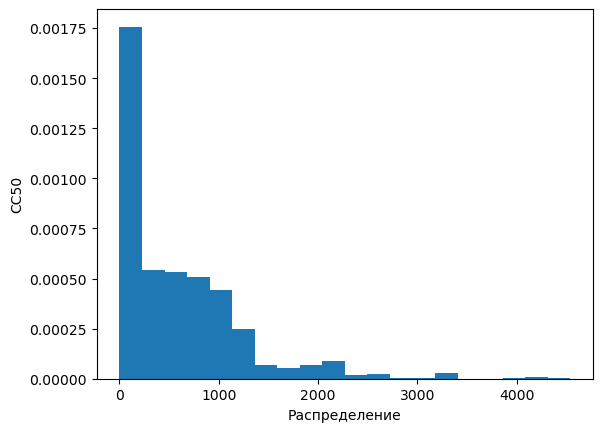

In [23]:
plt.xlabel('Распределение')
plt.ylabel('CC50')
plt.hist(x = y_cc, bins=20, density=True)

(array([1.26629158e-03, 3.83724723e-06, 3.83724723e-06, 0.00000000e+00,
        0.00000000e+00, 1.27908241e-06, 1.27908241e-06, 1.27908241e-06,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.27908241e-06,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.27908241e-06]),
 array([1.14892695e-02, 7.81040915e+02, 1.56207034e+03, 2.34309977e+03,
        3.12412919e+03, 3.90515862e+03, 4.68618804e+03, 5.46721747e+03,
        6.24824689e+03, 7.02927632e+03, 7.81030574e+03, 8.59133517e+03,
        9.37236460e+03, 1.01533940e+04, 1.09344234e+04, 1.17154529e+04,
        1.24964823e+04, 1.32775117e+04, 1.40585411e+04, 1.48395706e+04,
        1.56206000e+04]),
 <BarContainer object of 20 artists>)

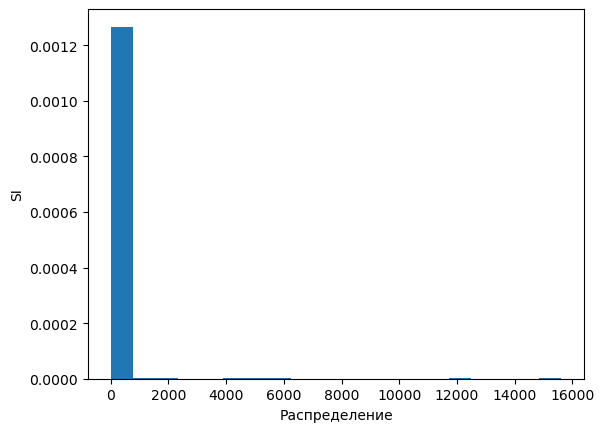

In [24]:
plt.xlabel('Распределение')
plt.ylabel('SI')
plt.hist(x = y_si, bins=20, density=True)

На данный момент признаков в датасете очень много - более 200 - вряд ли все из них будут информативны. Для отбора признаков будем использовать SelectKBest. До этого выведем медианы и значение SI > 8. Перед тем, как выбирать признаки, разделим наши данные на train и test по каждой из целевых переменных. Выбирать признаки будем по train выборке, медианы также будем брать только по train выборке (сделаем это позже, после отбора признаков и их стандартизации).

In [26]:
si_cl_8 = (y_si > 8).astype(int)

In [27]:
y_ic = np.log10(y_ic + 1e-6)
y_cc = np.log10(y_cc + 1e-6)
y_si = np.log10(y_si + 1e-6)

Проверим, как выглядит распределение целевых переменных после логарифмирования.

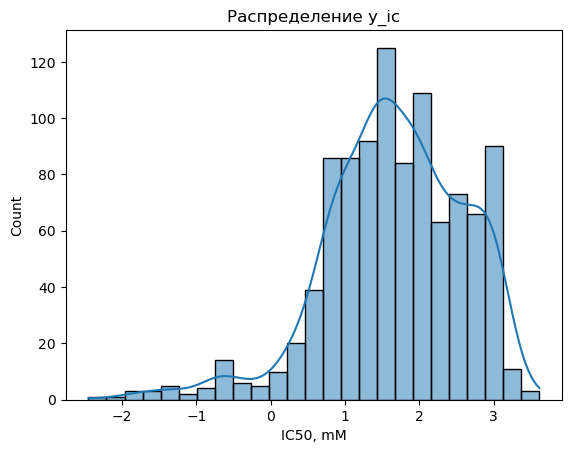

In [29]:
sns.histplot(y_ic, kde=True)
plt.title("Распределение y_ic")
plt.show()

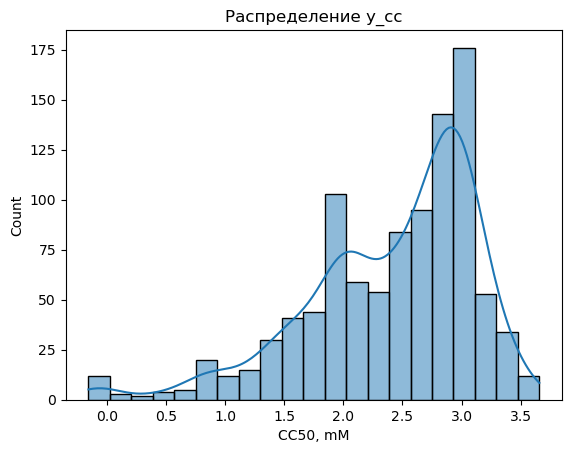

In [30]:
sns.histplot(y_cc, kde=True)
plt.title("Распределение y_cc")
plt.show()

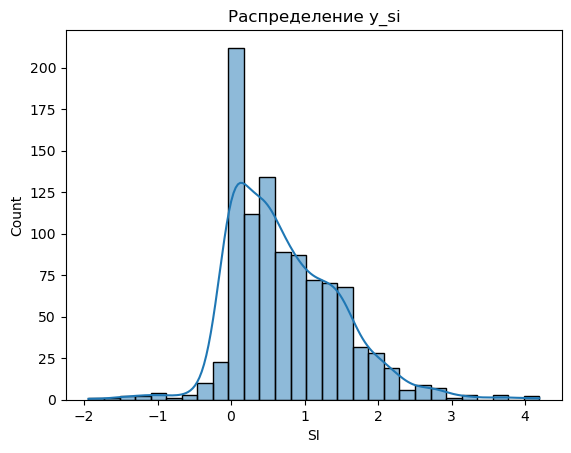

In [31]:
sns.histplot(y_si, kde=True)
plt.title("Распределение y_si")
plt.show()

Распределение изменилось, став немного ближе к нормальному. Переходим к разделению данных на тренирвочные и тестовые выборки и работе с целевыми показателями - медианами.

In [33]:
from sklearn.model_selection import train_test_split

X_train_ic, X_test_ic, y_train_ic, y_test_ic = train_test_split(X_all, y_ic, test_size=0.3, random_state=42)
X_train_cc, X_test_cc, y_train_cc, y_test_cc = train_test_split(X_all, y_cc, test_size=0.3, random_state=42)
X_train_si, X_test_si, y_train_si, y_test_si = train_test_split(X_all, y_si, test_size=0.3, random_state=42)

X_train_class_ic, X_test_class_ic, y_train_class_ic, y_test_class_ic = train_test_split(X_all, y_ic, test_size=0.3, random_state = 42)
X_train_class_cc, X_test_class_cc, y_train_class_cc, y_test_class_cc = train_test_split(X_all, y_cc, test_size=0.3, random_state = 42)
X_train_class_si, X_test_class_si, y_train_class_si, y_test_class_si = train_test_split(X_all, y_si, test_size=0.3, random_state = 42)
X_train_class_si8, X_test_class_si8, y_train_class_si8, y_test_class_si8 = train_test_split(X_all, y_si, test_size=0.3, random_state = 42)

Заполним пропуски средним по каждой из train и test выборок отдельно.

In [35]:
X_train_ic = X_train_ic.apply(lambda x: x.fillna(x.mean()) if x.isna().any() else x)
X_test_ic = X_test_ic.apply(lambda x: x.fillna(x.mean()) if x.isna().any() else x)

X_train_cc = X_train_cc.apply(lambda x: x.fillna(x.mean()) if x.isna().any() else x)
X_test_cc = X_test_cc.apply(lambda x: x.fillna(x.mean()) if x.isna().any() else x)

X_train_si = X_train_si.apply(lambda x: x.fillna(x.mean()) if x.isna().any() else x)
X_test_si = X_test_si.apply(lambda x: x.fillna(x.mean()) if x.isna().any() else x)

In [36]:
X_train_class_ic = X_train_class_ic.apply(lambda x: x.fillna(x.mean()) if x.isna().any() else x)
X_test_class_ic = X_test_class_ic.apply(lambda x: x.fillna(x.mean()) if x.isna().any() else x)

X_train_class_cc = X_train_class_cc.apply(lambda x: x.fillna(x.mean()) if x.isna().any() else x)
X_test_class_cc = X_test_class_cc.apply(lambda x: x.fillna(x.mean()) if x.isna().any() else x)

X_train_class_si = X_train_class_si.apply(lambda x: x.fillna(x.mean()) if x.isna().any() else x)
X_test_class_si = X_test_class_si.apply(lambda x: x.fillna(x.mean()) if x.isna().any() else x)

X_train_class_si8 = X_train_class_si8.apply(lambda x: x.fillna(x.mean()) if x.isna().any() else x)
X_test_class_si8 = X_test_class_si8.apply(lambda x: x.fillna(x.mean()) if x.isna().any() else x)

In [37]:
median_ic50 = y_train_class_ic.median()  #взяли медиану по train выборке и применили ее к train и test выборкам отдельно
median_cc50 = y_train_class_cc.median()
median_si = y_train_class_si.median()
si_cl_8 = (y_train_class_si > 8).astype(int)
si_cl_8_test = (y_test_class_si > 8).astype(int) #для тестовой выборки задаем отдельное значение для SI > 8, так как в ней меньше объектов, чтобы избежать проблем

y_train_class_ic = (y_train_class_ic > median_ic50).astype(int)
y_train_class_cc = (y_train_class_cc > median_cc50).astype(int)
y_train_class_si = (y_train_class_si > median_si).astype(int)
y_train_class_si8 = (y_train_class_si8 > si_cl_8).astype(int)

In [38]:
y_test_class_ic = (y_test_class_ic > median_ic50).astype(int)
y_test_class_cc = (y_test_class_cc > median_cc50).astype(int)
y_test_class_si = (y_test_class_si > median_si).astype(int)
y_test_class_si8 = (y_test_class_si8 > si_cl_8_test).astype(int)

In [39]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression  #отбор признаков

original_columns_ic = X_train_ic.columns

selector_ic = SelectKBest(score_func=mutual_info_regression, k=50)
X_train_ic = selector_ic.fit_transform(X_train_ic, y_train_ic)
X_test_ic = selector_ic.transform(X_test_ic)

selected_features_ic = original_columns_ic[selector_ic.get_support()]
X_train_ic = pd.DataFrame(X_train_ic, columns=selected_features_ic)
X_test_ic = pd.DataFrame(X_test_ic, columns=selected_features_ic)

In [40]:
original_columns_cc = X_train_cc.columns

selector_cc = SelectKBest(score_func=mutual_info_regression, k=50)
X_train_cc = selector_cc.fit_transform(X_train_cc, y_train_cc)
X_test_cc = selector_cc.transform(X_test_cc)

selected_features_cc = original_columns_cc[selector_cc.get_support()]
X_train_cc = pd.DataFrame(X_train_cc, columns=selected_features_cc)
X_test_cc = pd.DataFrame(X_test_cc, columns=selected_features_cc)

In [41]:
original_columns_si = X_train_si.columns

selector_si = SelectKBest(score_func=mutual_info_regression, k=50)
X_train_si = selector_si.fit_transform(X_train_si, y_train_si)
X_test_si = selector_si.transform(X_test_si)

selected_features_si = original_columns_si[selector_si.get_support()]
X_train_si = pd.DataFrame(X_train_si, columns=selected_features_si)
X_test_si = pd.DataFrame(X_test_si, columns=selected_features_si)

In [42]:
original_columns_ic_class = X_train_class_ic.columns

selector_ic_class = SelectKBest(score_func=mutual_info_regression, k=50)
X_train_class_ic = selector_ic_class.fit_transform(X_train_class_ic, y_train_class_ic)
X_test_class_ic = selector_ic_class.transform(X_test_class_ic)

selected_features_ic_class = original_columns_ic_class[selector_ic_class.get_support()]
X_train_class_ic = pd.DataFrame(X_train_class_ic, columns=selected_features_ic_class)
X_test_class_ic = pd.DataFrame(X_test_class_ic, columns=selected_features_ic_class)

In [43]:
original_columns_cc_class = X_train_class_cc.columns

selector_cc_class = SelectKBest(score_func=mutual_info_regression, k=50)
X_train_class_cc = selector_cc_class.fit_transform(X_train_class_cc, y_train_class_cc)
X_test_class_cc = selector_cc_class.transform(X_test_class_cc)

selected_features_cc_class = original_columns_cc_class[selector_cc_class.get_support()]
X_train_class_cc = pd.DataFrame(X_train_class_cc, columns=selected_features_cc_class)
X_test_class_cc = pd.DataFrame(X_test_class_cc, columns=selected_features_cc_class)

In [44]:
original_columns_si_class = X_train_class_si.columns

selector_si_class = SelectKBest(score_func=mutual_info_regression, k=50)
X_train_class_si = selector_si_class.fit_transform(X_train_class_si, y_train_class_si)
X_test_class_si = selector_si_class.transform(X_test_class_si)

selected_features_si_class = original_columns_si_class[selector_si_class.get_support()]
X_train_class_si = pd.DataFrame(X_train_class_si, columns=selected_features_si_class)
X_test_class_si = pd.DataFrame(X_test_class_si, columns=selected_features_si_class)

In [45]:
original_columns_si8_class = X_train_class_si8.columns

selector_si8_class = SelectKBest(score_func=mutual_info_regression, k=50)
X_train_class_si8 = selector_si8_class.fit_transform(X_train_class_si8, y_train_class_si8)
X_test_class_si8 = selector_si8_class.transform(X_test_class_si8)

selected_features_si8_class = original_columns_si8_class[selector_si8_class.get_support()]
X_train_class_si8 = pd.DataFrame(X_train_class_si8, columns=selected_features_si8_class)
X_test_class_si8 = pd.DataFrame(X_test_class_si8, columns=selected_features_si8_class)

Используем VarianceThreshold для отбора более информативных признаков.

In [47]:
from sklearn.feature_selection import VarianceThreshold

var_ic = VarianceThreshold(threshold=0.01)
X_train_ic = var_ic.fit_transform(X_train_ic)
X_test_ic = var_ic.transform(X_test_ic)
feature_names_ic = selected_features_ic[var_ic.get_support()]

var_cc = VarianceThreshold(threshold=0.01)
X_train_cc = var_cc.fit_transform(X_train_cc)
X_test_cc = var_cc.transform(X_test_cc)
feature_names_cc = selected_features_cc[var_cc.get_support()]

var_si = VarianceThreshold(threshold=0.01)
X_train_si = var_si.fit_transform(X_train_si)
X_test_si = var_si.transform(X_test_si)
feature_names_si = selected_features_si[var_si.get_support()]

In [48]:
var_ic_class = VarianceThreshold(threshold=0.01)
X_train_class_ic = var_ic_class.fit_transform(X_train_class_ic)
X_test_class_ic = var_ic_class.transform(X_test_class_ic)
feature_names_ic_class = selected_features_ic_class[var_ic_class.get_support()]

var_cc_class = VarianceThreshold(threshold=0.01)
X_train_class_cc = var_cc_class.fit_transform(X_train_class_cc)
X_test_class_cc = var_cc_class.transform(X_test_class_cc)
feature_names_cc_class = selected_features_cc_class[var_cc_class.get_support()]

var_si_class = VarianceThreshold(threshold=0.01)
X_train_class_si = var_si_class.fit_transform(X_train_class_si)
X_test_class_si = var_si_class.transform(X_test_class_si)
feature_names_si_class = selected_features_si_class[var_si_class.get_support()]

var_si8_class = VarianceThreshold(threshold=0.01)
X_train_class_si8 = var_si8_class.fit_transform(X_train_class_si8)
X_test_class_si8 = var_si8_class.transform(X_test_class_si8)
feature_names_si8_class = selected_features_si8_class[var_si8_class.get_support()]

In [49]:
X_train_ic = pd.DataFrame(X_train_ic, columns=feature_names_ic)
X_test_ic = pd.DataFrame(X_test_ic, columns=feature_names_ic)

X_train_cc = pd.DataFrame(X_train_cc, columns=feature_names_cc)
X_test_cc = pd.DataFrame(X_test_cc, columns=feature_names_cc)

X_train_si = pd.DataFrame(X_train_si, columns=feature_names_si)
X_test_si = pd.DataFrame(X_test_si, columns=feature_names_si)

In [50]:
X_train_class_ic = pd.DataFrame(X_train_class_ic, columns=feature_names_ic_class)
X_train_class_cc = pd.DataFrame(X_train_class_cc, columns=feature_names_cc_class)
X_train_class_si = pd.DataFrame(X_train_class_si, columns=feature_names_si_class)
X_train_class_si8 = pd.DataFrame(X_train_class_si8, columns=feature_names_si8_class)

X_test_class_ic = pd.DataFrame(X_test_class_ic, columns=feature_names_ic_class)
X_test_class_cc = pd.DataFrame(X_test_class_cc, columns=feature_names_cc_class)
X_test_class_si = pd.DataFrame(X_test_class_si, columns=feature_names_si_class)
X_test_class_si8 = pd.DataFrame(X_test_class_si8, columns=feature_names_si8_class)

In [51]:
feature_names_ic = X_train_ic.columns  #сохраним названия столбцов для стандартизации
feature_names_cc = X_train_cc.columns
feature_names_si = X_train_si.columns

In [52]:
feature_names_class_ic = X_train_class_ic.columns
feature_names_class_cc = X_train_class_cc.columns
feature_names_class_si = X_train_class_si.columns
feature_names_class_si8 = X_train_class_si8.columns

Стандартизируем наши датасеты.

In [54]:
from sklearn.preprocessing import StandardScaler

scaler_ic = StandardScaler()
X_train_ic = scaler_ic.fit_transform(X_train_ic)
X_test_ic = scaler_ic.transform(X_test_ic)
X_train_ic = pd.DataFrame(X_train_ic, columns=feature_names_ic)
X_test_ic = pd.DataFrame(X_test_ic, columns=feature_names_ic)

scaler_cc = StandardScaler()
X_train_cc = scaler_cc.fit_transform(X_train_cc)
X_test_cc = scaler_cc.transform(X_test_cc)
X_train_cc = pd.DataFrame(X_train_cc, columns=feature_names_cc)
X_test_cc = pd.DataFrame(X_test_cc, columns=feature_names_cc)

scaler_si = StandardScaler()
X_train_si = scaler_si.fit_transform(X_train_si)
X_test_si = scaler_si.transform(X_test_si)
X_train_si = pd.DataFrame(X_train_si, columns=feature_names_si)
X_test_si = pd.DataFrame(X_test_si, columns=feature_names_si)

In [55]:
scaler_class_ic = StandardScaler()
X_train_class_ic = scaler_class_ic.fit_transform(X_train_class_ic)
X_test_class_ic = scaler_class_ic.transform(X_test_class_ic)
X_train_class_ic = pd.DataFrame(X_train_class_ic, columns=feature_names_class_ic)
X_test_class_ic = pd.DataFrame(X_test_class_ic, columns=feature_names_class_ic)

scaler_class_cc = StandardScaler()
X_train_class_cc = scaler_class_cc.fit_transform(X_train_class_cc)
X_test_class_cc = scaler_class_cc.transform(X_test_class_cc)
X_train_class_cc = pd.DataFrame(X_train_class_cc, columns=feature_names_class_cc)
X_test_class_cc = pd.DataFrame(X_test_class_cc, columns=feature_names_class_cc)

scaler_class_si = StandardScaler()
X_train_class_si = scaler_class_si.fit_transform(X_train_class_si)
X_test_class_si = scaler_class_si.transform(X_test_class_si)
X_train_class_si = pd.DataFrame(X_train_class_si, columns=feature_names_class_si)
X_test_class_si = pd.DataFrame(X_test_class_si, columns=feature_names_class_si)

scaler_class_si8 = StandardScaler()
X_train_class_si8 = scaler_class_si8.fit_transform(X_train_class_si8)
X_test_class_si8 = scaler_class_si8.transform(X_test_class_si8)
X_train_class_si8 = pd.DataFrame(X_train_class_si8, columns=feature_names_class_si8)
X_test_class_si8 = pd.DataFrame(X_test_class_si8, columns=feature_names_class_si8)

После проделанной работы у нас оказалось несколько более маленьких датасетов из исходного большого, отдельно для каждой из задач: - Регрессия для IC50 - Регрессия для CC50 - Регрессия для SI - Классификация: превышает ли значение IC50 медианное значение выборки - Классификация: превышает ли значение CC50 медианное значение выборки - Классификация: превышает ли значение SI медианное значение выборки - Классификация: превышает ли значение SI значение 8

Они очищены от выбросов, дубликатов, пропущенных значений. Целевые переменные логарифмированы, признаки стандартизированы, отобраны 50 самых информативных признаков для каждого из созданных датасетов. Обозначены медианы и SI > 8 для задач классификации. Данный EDA полностью подготовил данные к применению различных алгоритмов и обработал данные надлежащим образом, чтобы избавиться от большого разброса и других аномалий, которые могут внести шум в данные.